In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import glob
import datetime

In [2]:
datetime.timedelta(hours=0)

datetime.timedelta(0)

3 -2 days +05:44:19
15 -1 days +00:10:32
11 1 days 15:32:31
7 -2 days +14:41:17
5 1 days 19:20:18
14 -2 days +00:41:07
4 -2 days +10:15:19
12 1 days 16:27:37
0 -1 days +09:44:41
10 0 days 06:34:07
1 -1 days +16:52:08
6 0 days 20:50:37


C:\Users\kompn\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


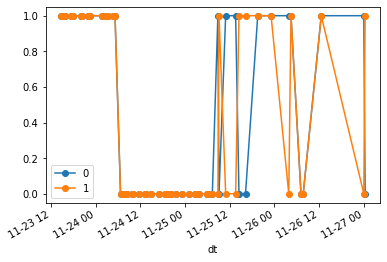

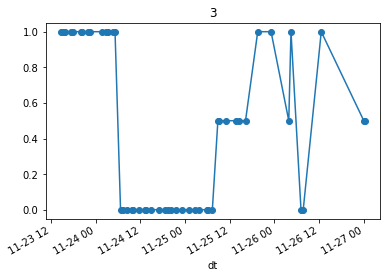

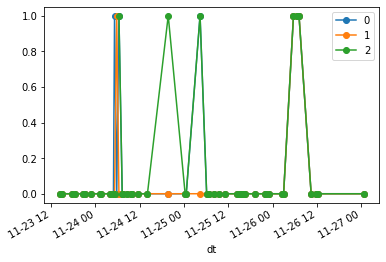

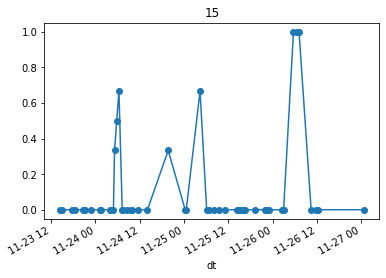

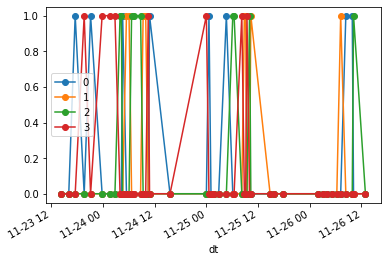

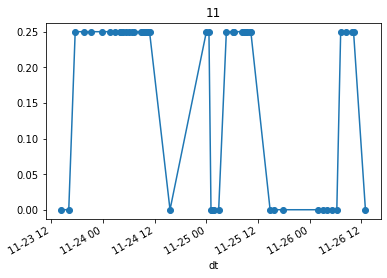

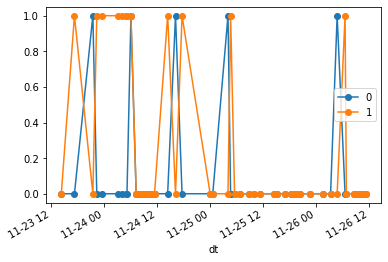

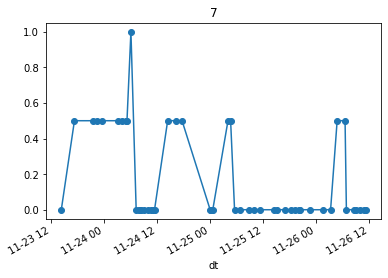

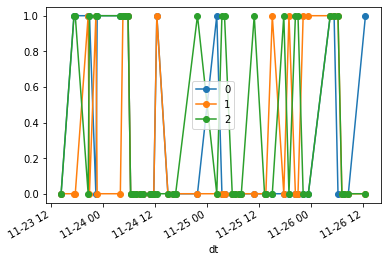

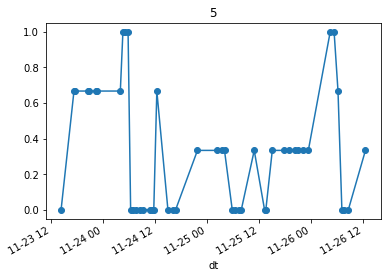

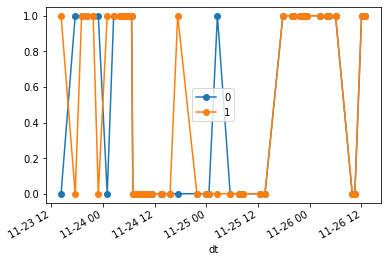

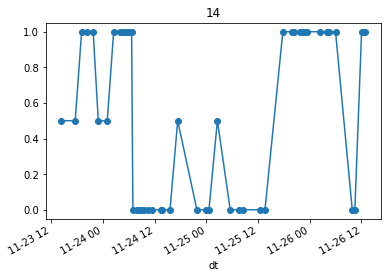

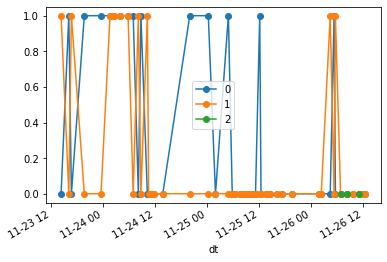

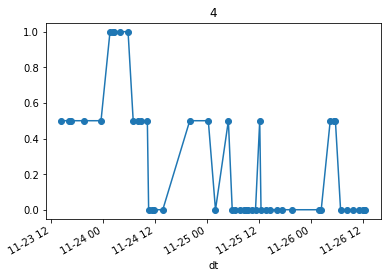

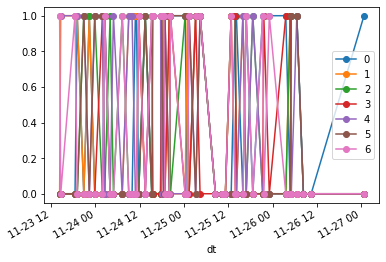

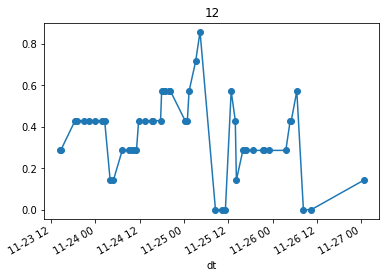

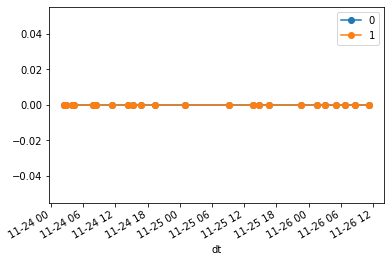

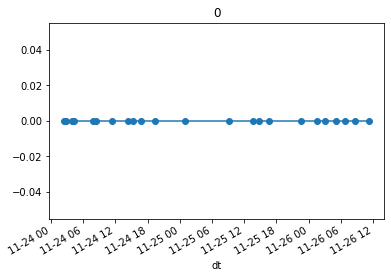

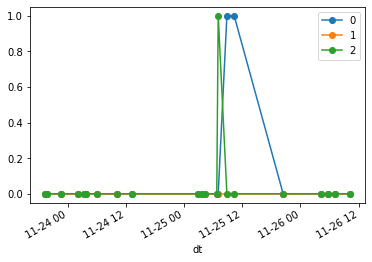

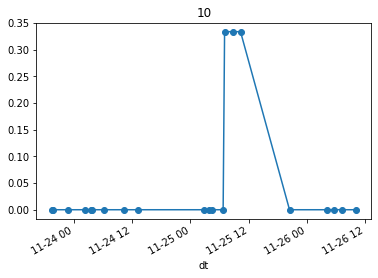

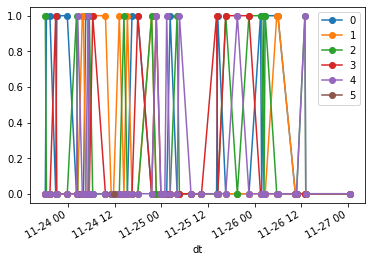

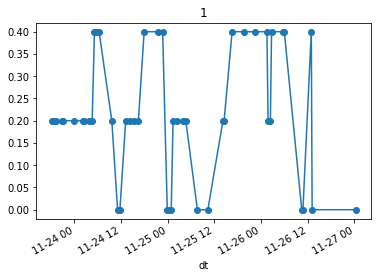

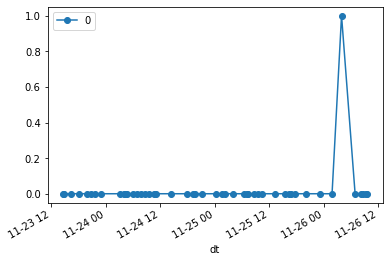

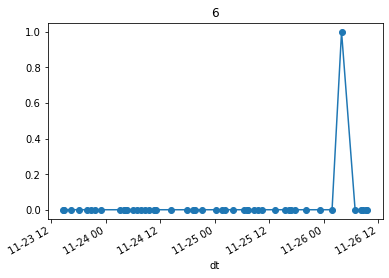

In [3]:
# pd.read_csv(r'../../')

z = zipfile.ZipFile('../../data.zip')
common_dict={}
for file in z.namelist():
    if '.txt' not in file:
        continue
    if file.split("/")[2] not in common_dict.keys():
        common_dict[file.split("/")[2]] = []
    content = pd.read_csv(z.open(file),sep=' ',header=None)
    _time = file.split("/")[-1].split('.')[0]
    time = datetime.datetime.strptime(_time[:-3], "%d-%m-%Y_%H-%M-%S")
    
    _df = content.iloc[:,:1].T
    _df['dt'] = [time + (datetime.timedelta(hours=12) if _time[-2:]=='PM' else datetime.timedelta(hours=0)) ]    
    
    common_dict[file.split("/")[2]].append(_df)
for key in common_dict:
    common_dict[key] = pd.concat(common_dict[key]).set_index('dt')
    common_dict[key].plot(marker='o')
    plt.figure()
    common_dict[key].mean(1).plot(marker='o')
    plt.title(key)
    print(key,common_dict[key].index[-1] - common_dict[key].index[0]) 

<AxesSubplot:xlabel='dt'>

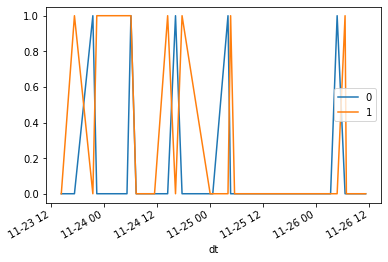

In [4]:
common_dict['7'].plot()

In [87]:
import sys
sys.path.insert(1, 'C:/Users/kompn/YandexDisk/papers/!Turbo/DL-anomaly-detection/')
sys.path.insert(1, 'C:/Users/V.Kozitisn/Disk/papers/!Turbo/DL-anomaly-detection/')
from tsad.src.useful import split_by_repeated

In [10]:
common_dict['7'].sort_index().to_csv('8.csv',sep=';')

In [91]:
len(common_dict['7'])

50

<AxesSubplot:xlabel='dt'>

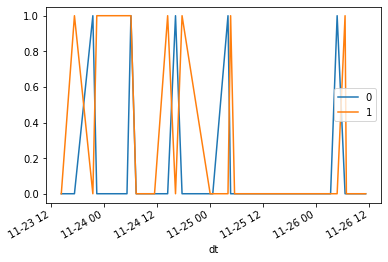

In [9]:
common_dict['7'].sort_index().plot()

In [75]:
datetime.datetime.strptime('26-11-2021_14-53-13', "%d-%m-%Y_%H-%M-%S") == datetime.datetime.strptime("26-11-2021_2-53-13_PM", "%d-%m-%Y_%H-%M-%S_%p")

False